# Analysis of Titanic Data

In [160]:
import csv
import numpy as np
import matplotlib.pyplot as plt

## Importation of Data 

Importation des données et separation pour meilleur analyse


In [161]:

titanic = []
with open('titanic.csv', newline='') as csvfile: 
    reader = csv.DictReader(csvfile) #Première ligne avec le noms des variables 
    for i, row in enumerate(reader,start=1) :  # 1 pour ne pas prendre le header en compte 
        survived = int(row['Survived']) # 0 = No, 1 = Yes
        pclass = float(row['Pclass']) #	1 = 1st, 2 = 2nd, 3 = 3rd
        sex = 0 if row['Sex'] == 'female' else 1
        age = float(row['Age']) 
        sibsp = int(row['Siblings/Spouses Aboard']) #Siblings and spouses 
        parch = int(row['Parents/Children Aboard']) # Parents and children 
        fare = float(row['Fare'])
        titanic.append([survived,pclass,sex,age,sibsp,parch,fare]) 
titanic = np.array(titanic)

print(titanic.shape)
#Affectation de chaque colonne à une variable pour mieux analyser
survie = titanic[:,0]
pclass = titanic[:,1]
sex = titanic[:,2]
age = titanic[:,3]
sibsp = titanic[:,4]
parch = titanic[:,5]
fare = titanic[:,6]


(887, 7)


Description de la variable 'age'

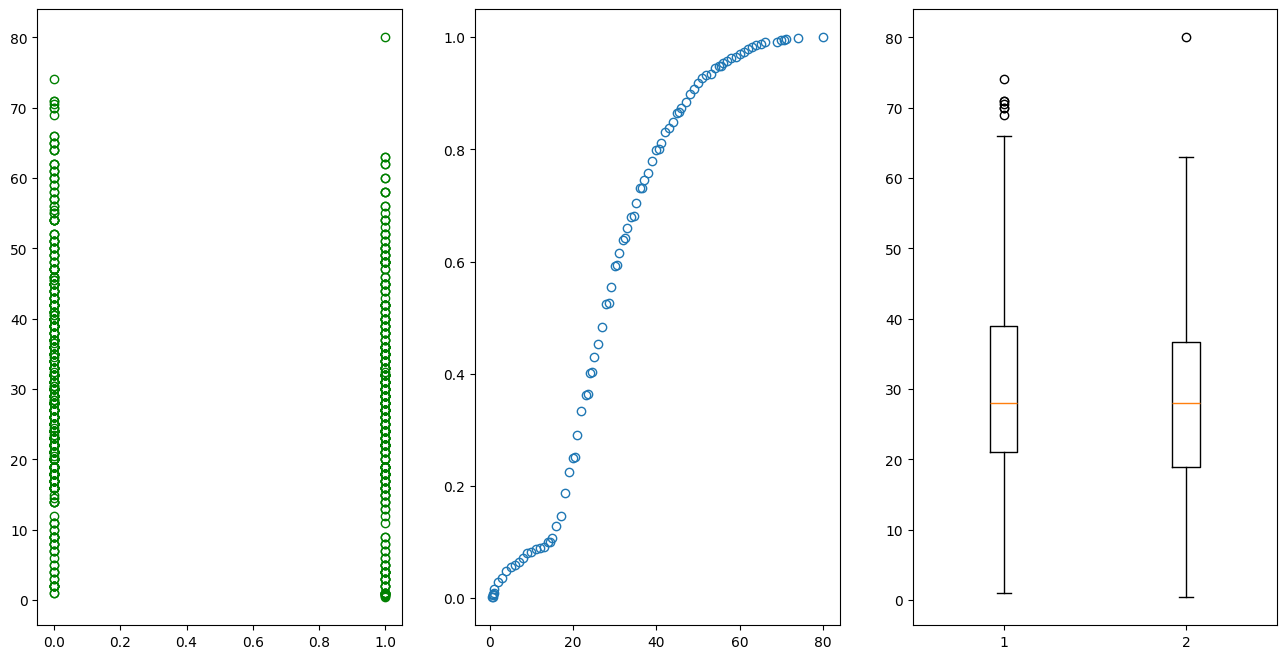

In [162]:
plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
plt.plot(survie,age,'o',mfc = 'none',color = 'green') # La survie en focntion de l'age
mod_age,eff_age = np.unique(age,return_counts=True)
f_cum_age = np.cumsum(eff_age / np.sum(eff_age))
plt.subplot(1,3,2)
plt.plot(mod_age,f_cum_age,'o',mfc = 'none') #fonction empirique sur laquelle on voit qu''il y a un acroisement lent pour l'age entre 0 et 15
ages_morts = age[survie==0]
ages_vivant = age[survie==1]
plt.subplot(1,3,3)
plt.boxplot([ages_morts,ages_vivant]);

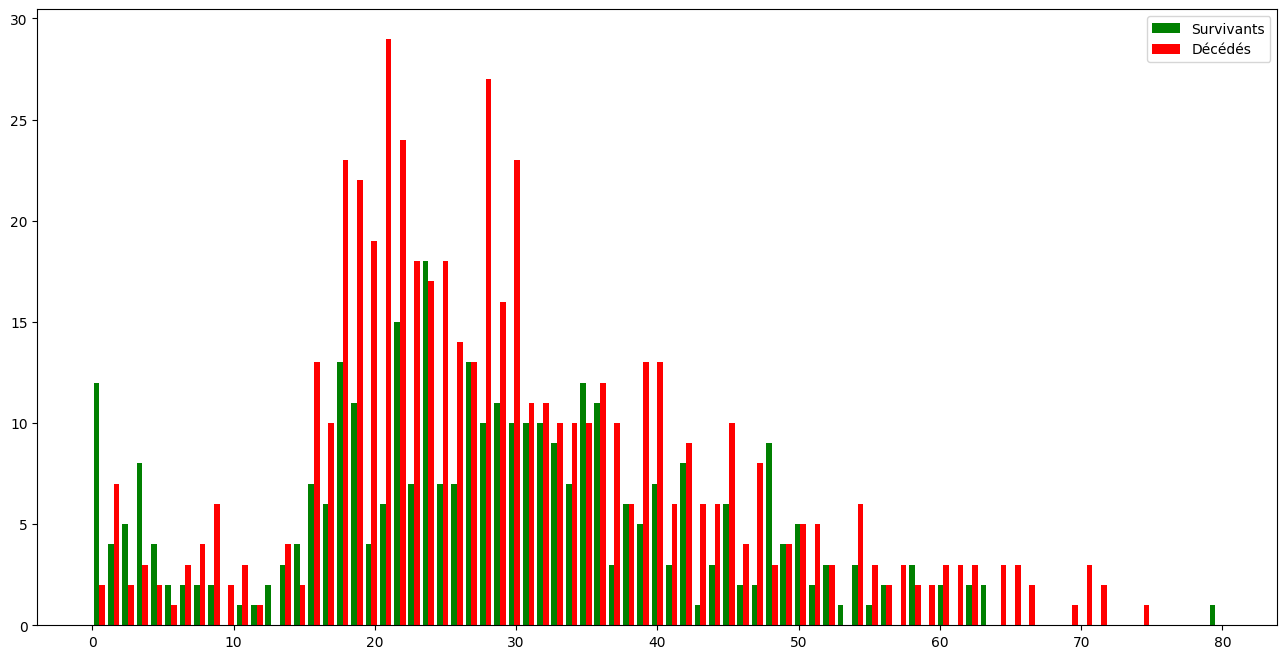

In [163]:
bins = np.linspace(0, 80, 80)  #un bin pour chaque age
plt.figure(figsize=(16, 8))
plt.hist([ages_vivant,ages_morts], 
         bins=bins, 
         color=['green', 'red'],
         label=['Survivants','Décédés']);
plt.legend()

Description variable 'sex'

Rapport morts/vivants chez les hommes:  4.256880733944954
Rapport morts/vivants chez les femmes:  0.34763948497854075


<BarContainer object of 2 artists>

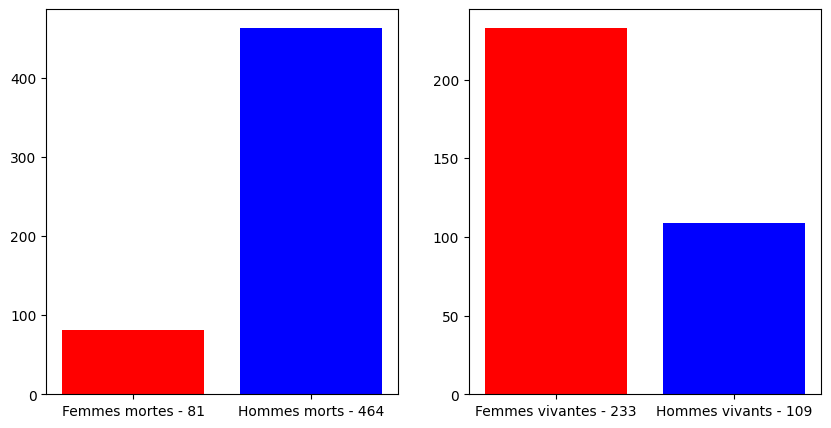

In [164]:
femmes = sex == 0
hommes = sex == 1
vivants = survie == 1
morts = survie == 0
# Groupes
femmes_mortes = titanic[np.logical_and(femmes, morts)]
femmes_vivantes = titanic[np.logical_and(femmes,vivants)]
hommes_morts = titanic[np.logical_and(hommes,morts)]
hommes_vivants = titanic[np.logical_and(hommes,vivants)]

nb_femmes_mortes = len(femmes_mortes)
nb_hommes_morts = len(hommes_morts)
nb_femmes_vivantes = len(femmes_vivantes)
nb_hommes_vivants = len(hommes_vivants)

print('Rapport morts/vivants chez les hommes: ',nb_hommes_morts/nb_hommes_vivants)
print('Rapport morts/vivants chez les femmes: ',nb_femmes_mortes/nb_femmes_vivantes)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar([f'Femmes mortes - {nb_femmes_mortes}', f'Hommes morts - {nb_hommes_morts}'], [nb_femmes_mortes, nb_hommes_morts], color=['red', 'blue'])
plt.subplot(1,2,2)
plt.bar([f'Femmes vivantes - {nb_femmes_vivantes}', f'Hommes vivants - {nb_hommes_vivants}'], [nb_femmes_vivantes, nb_hommes_vivants], color=['red', 'blue'])

Description variable 'pclass'

Rapport morts/vivants en premiere classe  0.5882352941176471
Rapport morts/vivants en deuxieme classe:  1.1149425287356323
Rapport morts/vivants en troisieme classe:  3.092436974789916


<BarContainer object of 3 artists>

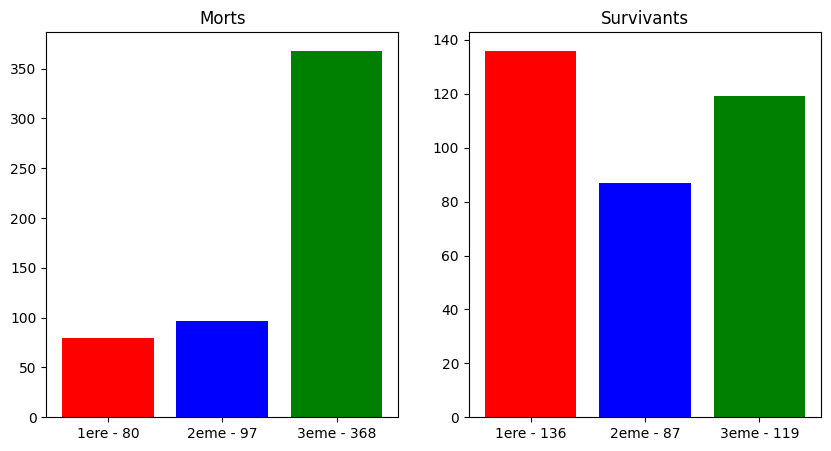

In [165]:
premiere = pclass == 1
deuxieme = pclass == 2
troisieme = pclass == 3

morts_premiere = titanic[np.logical_and(premiere,morts)]
vivants_premiere = titanic[np.logical_and(premiere,vivants)]
morts_deuxieme = titanic[np.logical_and(deuxieme,morts)]
vivants_deuxieme = titanic[np.logical_and(deuxieme,vivants)]
morts_troisieme = titanic[np.logical_and(troisieme,morts)]
vivants_troisieme = titanic[np.logical_and(troisieme,vivants)]

nb_premiere_morts = len(morts_premiere)
nb_deuxieme_morts = len(morts_deuxieme)
nb_troisieme_morts = len(morts_troisieme)
nb_premiere_vivants = len(vivants_premiere)
nb_deuxieme_vivants = len(vivants_deuxieme)
nb_troisieme_vivants = len(vivants_troisieme)

print('Rapport morts/vivants en premiere classe ',nb_premiere_morts/nb_premiere_vivants)
print('Rapport morts/vivants en deuxieme classe: ',nb_deuxieme_morts/nb_deuxieme_vivants)
print('Rapport morts/vivants en troisieme classe: ',nb_troisieme_morts/nb_troisieme_vivants)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Morts')
plt.bar([f'1ere - {nb_premiere_morts}', f'2eme - {nb_deuxieme_morts}', f'3eme - {nb_troisieme_morts}'], [nb_premiere_morts, nb_deuxieme_morts,nb_troisieme_morts], color=['red', 'blue','green'])
plt.subplot(1,2,2)
plt.title('Survivants')
plt.bar([f'1ere - {nb_premiere_vivants}', f'2eme - {nb_deuxieme_vivants}', f'3eme - {nb_troisieme_vivants}'], [nb_premiere_vivants, nb_deuxieme_vivants,nb_troisieme_vivants], color=['red', 'blue','green'])

Etude des variables sibsp et parch

In [167]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(titanic)
print(pca.explained_variance_ratio_*100)

[9.25602834e+01 7.34624215e+00 4.49505180e-02 1.82344920e-02
 1.69246039e-02 9.83413829e-03 3.53072029e-03]


# Regression